# Fundamentos de Análise de Dados 2022.1

# Dataset

_Naval Propulsion Plants_: regressão múltipla (2 variáveis de saída), estimar cada variável de saída separadamente:
- 11934 amostras;
- 16 características reais;
- 2 características reais para estimar, mas estimar somente _GT Compressor decay state coecient_ (remover _GT Turbine decay state coecient_).

# 01. Fazer o _download_ do respectivo banco de dados.

Link: http://archive.ics.uci.edu/ml/datasets/condition+based+maintenance+of+naval+propulsion+plants

Após feito o download, os dados foram salvos em _"../data/naval_data.txt"_.

# 02. Fazer a leitura dos dados.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.linalg import lu

In [2]:
column_names = [
    "Lever position",
    "Ship speed",
    "Gas Turbine shaft torque",
    "GT rate of revolutions",
    "Gas Generator rate of revolutions",
    "Starboard Propeller Torque",
    "Port Propeller Torque",
    "Hight Pressure Turbine exit temperature",
    "GT Compressor inlet air temperature",
    "GT Compressor outlet air temperature",
    "HP Turbine exit pressure",
    "GT Compressor inlet air pressure",
    "GT Compressor outlet air pressure",
    "GT exhaust gas pressure",
    "Turbine Injecton Control",
    "Fuel flow",
    "GT Compressor decay state coefficient",
    "GT Turbine decay state coefficient"
]

In [3]:
# read data using read_csv
# raw_data = pd.read_csv("data/naval_data.txt", sep="   ", header=None, engine='python')

# read data using read_fwf
raw_data = pd.read_fwf("../data/naval_data.txt", header=None)
raw_data.columns = column_names

In [4]:
raw_data.head()

,Lever position,Ship speed,Gas Turbine shaft torque,GT rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,Port Propeller Torque,Hight Pressure Turbine exit temperature,GT Compressor inlet air temperature,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor inlet air pressure,GT Compressor outlet air pressure,GT exhaust gas pressure,Turbine Injecton Control,Fuel flow,GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [5]:
# convert the DataFrame into a Numpy array
naval_array = raw_data.to_numpy()
naval_array

array([[1.1380000e+00, 3.0000000e+00, 2.8996400e+02, ..., 8.2000000e-02,
        9.5000000e-01, 9.7500000e-01],
       [2.0880000e+00, 6.0000000e+00, 6.9601800e+03, ..., 2.8700000e-01,
        9.5000000e-01, 9.7500000e-01],
       [3.1440000e+00, 9.0000000e+00, 8.3792290e+03, ..., 2.5900000e-01,
        9.5000000e-01, 9.7500000e-01],
       ...,
       [7.1480000e+00, 2.1000000e+01, 3.9003867e+04, ..., 8.3400000e-01,
        1.0000000e+00, 1.0000000e+00],
       [8.2060000e+00, 2.4000000e+01, 5.0992579e+04, ..., 1.1490000e+00,
        1.0000000e+00, 1.0000000e+00],
       [9.3000000e+00, 2.7000000e+01, 7.2775130e+04, ..., 1.7040000e+00,
        1.0000000e+00, 1.0000000e+00]])

# 03. Se necessário, dividir os dados em conjunto de treinamento (70%) e teste (30%), utilizando a função apropriada do scikit-learn. Quatro NumPy arrays devem ser criados: X_train, y_train, X_test e y_test.

In [6]:
data = raw_data.copy()
data.drop(["GT Turbine decay state coefficient"],
          axis=1,
          inplace=True)

print(data.shape)

X = data.drop(["GT Compressor decay state coefficient"],
              axis=1)

y = data[["GT Compressor decay state coefficient"]]

X.shape

(11934, 17)


(11934, 16)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [8]:
#X_train = X_train.to_numpy()
#X_test = X_test.to_numpy()
#y_train = y_train.to_numpy()
#y_test = y_test.to_numpy()

# 04. Acrescentar uma coluna de 1s ([1 1 . . . 1]^T) como última coluna da matriz de treinamento Xtrain (vamos chamá-la de X_train_2). Repita o procedimento para a matriz de teste, chamando-a de X_test_2.

[StackOverflow: How to add an extra column to a NumPy array](https://stackoverflow.com/questions/8486294/how-to-add-an-extra-column-to-a-numpy-array)

In [9]:
X_train.shape

(8353, 16)

In [10]:
def add_ones_column(data_array: np.array) -> np.array:
    length = data_array.shape[0]
    return np.c_[data_array, np.ones(length)]

# 05. Calcular o posto das matrizes X_train_2 e X_test_2. Se necessário, ajustar as matrizes X_train_2 e X_test_2.

In [11]:
np.linalg.matrix_rank(add_ones_column(X_train))

14

In [12]:
np.linalg.matrix_rank(add_ones_column(X_test))

14

In [13]:
add_ones_column(X_train).shape

(8353, 17)

# 06. Calcular a decomposição QR da matriz de treinamento: X_train_2 = QR, usando a função do NumPy apropriada.

In [14]:
Q, R = np.linalg.qr(add_ones_column(X_train))

In [15]:
coefs_lineares = np.linalg.solve(R, np.dot(Q.T, y_train))

In [16]:
np.allclose(add_ones_column(X_train), np.dot(Q, R))

True

In [17]:
A = add_ones_column(X_train)     # example for testing 
U = lu(A)[2]

In [18]:
def get_indices_for_linearly_independent_columns_of_A(U: np.ndarray) -> list:
    
    # I should first convert all "-0."s to "0." so that nonzero() can find them.
    U_copy = U.copy()
    U_copy[abs(U_copy) < 1.e-7] = 0

    # Because some rows in U may not have even one nonzero element,
    # I have to find the index for the first one in two steps.
    index_of_all_nonzero_cols_in_each_row = (
        [U_copy[i, :].nonzero()[0] for i in range(U_copy.shape[0])]
    )
    index_of_first_nonzero_col_in_each_row = (
        [indices[0] for indices in index_of_all_nonzero_cols_in_each_row
         if len(indices) > 0]
    )

    # Because two rows or more may have the same indices
    # for their first nonzero element, I should remove duplicates.
    unique_indices = sorted(list(set(index_of_first_nonzero_col_in_each_row)))
    return unique_indices

In [19]:
get_indices_for_linearly_independent_columns_of_A(U)

[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 12, 13, 14, 15]

A operação acima diz que as colunas 6, 11 e 16 são LD.
A 16 é a coluna de 1's.

In [20]:
len(get_indices_for_linearly_independent_columns_of_A(U))

14

In [21]:
len(U)

17

In [22]:
for i in range(len(add_ones_column(X_train.T))):
    if i not in get_indices_for_linearly_independent_columns_of_A(U):
        print(X_train.columns[i])

Port Propeller Torque
GT Compressor inlet air pressure


Colunas dependentes: as duas acima + a coluna de 1's

In [23]:
data = raw_data.copy()
data.drop(["GT Turbine decay state coefficient",
          "Port Propeller Torque",
          "GT Compressor inlet air pressure"],
          axis=1,
          inplace=True)

print(data.shape)

X = data.drop(["GT Compressor decay state coefficient"],
              axis=1)

y = data[["GT Compressor decay state coefficient"]]

X.shape

(11934, 15)


(11934, 14)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [25]:
Q, R = np.linalg.qr(X_train)
coefs_lineares = np.linalg.solve(R, np.dot(Q.T, y_train))

In [26]:
len(coefs_lineares)

14

In [27]:
y_train_preds = []

for i in range(len(X_train)):
    y_train_preds.append(np.dot(np.squeeze(coefs_lineares), X_train.iloc[i].values))

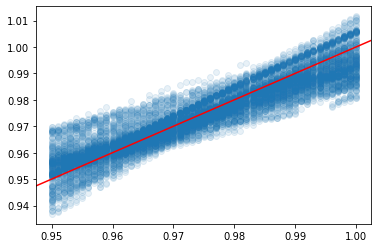

In [28]:
plt.scatter(x=y_train, y=y_train_preds, alpha=0.1)
plt.axline((1, 1), slope=1, color='r')
plt.show()

In [51]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [52]:
rmse(np.array(y_train_preds), y_train.values)

0.020011062958884756

In [47]:
from sklearn.metrics import mean_squared_error

mean_squared_error(np.array(y_train_preds), y_train.values, squared=False)

0.005861203460006054

0.07655849698110624

In [40]:
y_train.values

array([[0.956],
       [0.959],
       [0.999],
       ...,
       [0.964],
       [0.991],
       [0.974]])